In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



In [2]:


# MLP model sınıfını tanımlayalım
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # 28x28 = 784 piksel giriş, iki gizli katman ve 10 sınıflı çıktı için katmanlar
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        # Girişi düzleştirmemiz gerekiyor, çünkü başlangıçta 28x28 bir görüntü var
        x = x.view(x.size(0), -1)
        return self.model(x)
    


In [3]:


# Veri yükleme için dönüşümleri ayarlayalım
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Gri tonlamalı görüntüler için normalize etme
])

# Eğitim ve test veri setlerini yükleyelim
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Veri yükleyicileri oluşturalım
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Initialize lists to monitor test loss and accuracy
train_losses = []
test_accuracies = []



# Modeli ve eğitim parametrelerini ayarlayalım
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

# Training loop
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        train_losses.append(running_loss/len(trainloader))
        print(f"Training loss: {running_loss/len(trainloader)}")


# Test loop
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        accuracy = 100 * correct // total
        test_accuracies.append(accuracy)
        print(f'Accuracy of the network on the 10000 test images: {accuracy} %')


1.0%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




7.9%

100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Training loss: 0.8962654064236674
Training loss: 0.29356765789168476
Training loss: 0.21343139080064638
Training loss: 0.16602620939368695
Training loss: 0.13365533215992614
Accuracy of the network on the 10000 test images: 98 %
Accuracy of the network on the 10000 test images: 97 %
Accuracy of the network on the 10000 test images: 97 %
Accuracy of the network on the 10000 test images: 96 %
Accuracy of the network on the 10000 test images: 96 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of the network on the 10000

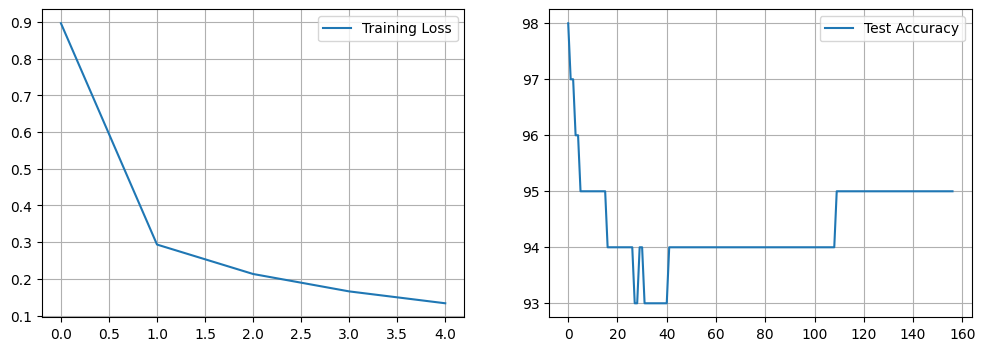

In [4]:
# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.grid()
plt.show()